### State-wise predictions for Number of Deceased during COVID

The following training and predictions have been done for the State of Delhi (India). These figures do not represent any offical records, and are just predicted for research/academic purposes. The same can be adopted for different states and regions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import LSTM,Dense,Dropout
import seaborn as sns
import scipy
from numpy import array
import math

In [4]:
data = pd.read_csv("../states.csv")
df = pd.DataFrame(data)

In [5]:
df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [6]:
f = df.loc[df['State'] == 'Delhi']

In [7]:
f.head(472)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
8,2020-03-02,Delhi,1,0,0,0,NaN
12,2020-03-03,Delhi,1,0,0,0,NaN
17,2020-03-04,Delhi,1,0,0,0,NaN
24,2020-03-05,Delhi,2,0,0,0,NaN
31,2020-03-06,Delhi,3,0,0,0,NaN
...,...,...,...,...,...,...,...
16428,2021-06-12,Delhi,1430884,1402474,24800,0,20190803.0
16465,2021-06-13,Delhi,1431139,1402850,24823,0,20263554.0
16502,2021-06-14,Delhi,1431270,1403205,24839,0,20323110.0
16539,2021-06-15,Delhi,1431498,1403569,24851,0,20394401.0


# Deceased

In [8]:
f_deceased = f.drop(['Date', 'State', 'Confirmed', 'Recovered', 'Other', 'Tested'], axis =1)

In [11]:
a = np.array(f_deceased)
a.shape

(474, 1)

In [12]:
x = np.linspace(1,474,474)

### Cumulative Death Report

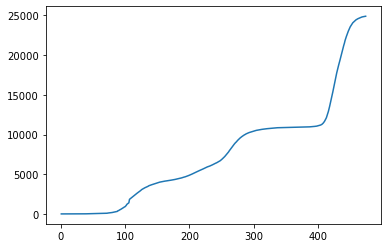

In [13]:
plt.plot(x,a)

In [14]:
a = a.reshape(474,)

In [44]:
b = []
cnt = 0
for i in a:
    if cnt >= 1:
        b.append( i - j)
    cnt += 1
    j = i
b = np.array(b)        

In [45]:
b.shape

(473,)

In [46]:
c = []
for i in b:
    if i <= 0:
        c.append(0.00001)
    else:
        c.append(math.log(i))
c = np.array(c)
c.shape

(473,)

In [47]:
x = np.linspace(1,473,473)

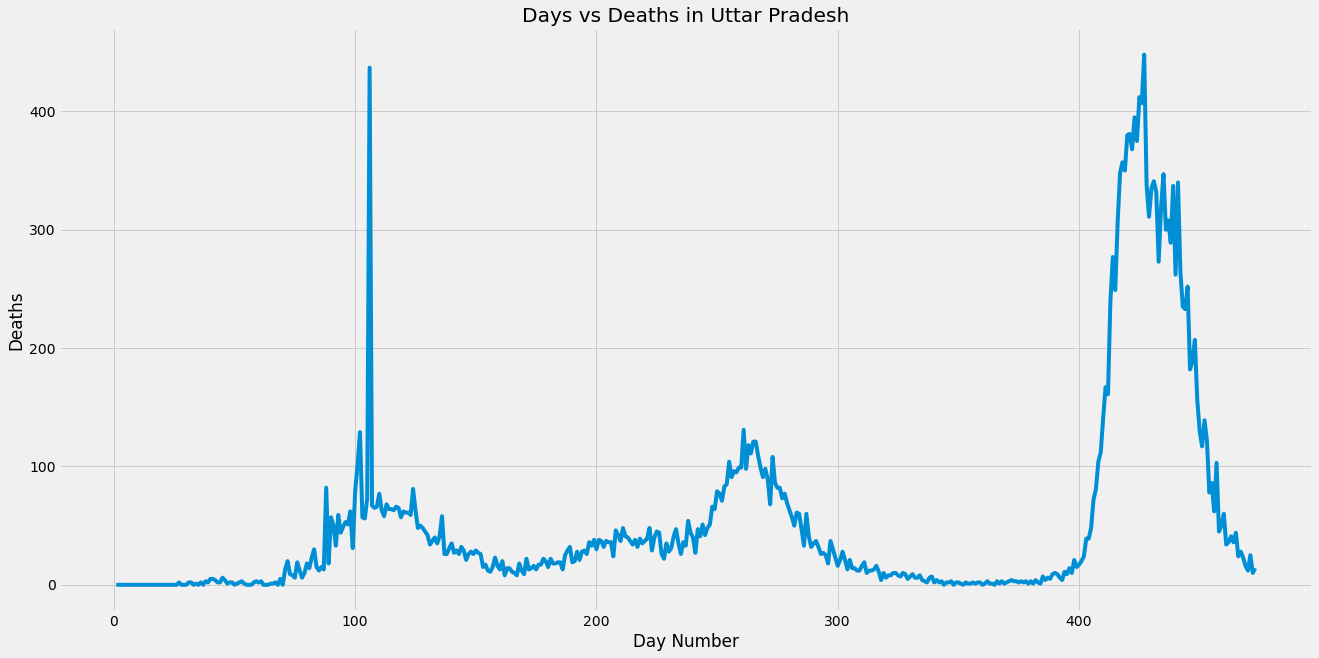

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
plt.ylabel('Deaths')
plt.xlabel('Day Number')
plt.title('Days vs Deaths in Uttar Pradesh')
plt.plot(x,b)

In [49]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq_1 = b
raw_seq_2 = c
# choose a number of time steps
n_steps = 100
# split into samples
X_train, y_train = split_sequence(raw_seq_1, n_steps)
X_train_, y_train_ = split_sequence(raw_seq_2, n_steps)


In [50]:
X_train.shape

(373, 100)

In [51]:
y_train.shape

(373,)

In [52]:
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [53]:
model1 = Sequential()

model1.add(LSTM(50, input_shape=(n_steps, 1)))
model1.add(Dense((40)))
#model1.add(Dense((30)))
model1.add(Dense((20)))
model1.add(Dense(10))
model1.add(Dense(1))
model1.compile(optimizer='RMSprop', loss='mse')

# fit model
model1.fit(X_train, y_train, epochs=40, verbose=1)

Epoch 1/40
12/12 [==============================] - 0s 22ms/step - loss: 11769.2148
Epoch 2/40
12/12 [==============================] - 0s 21ms/step - loss: 10325.7168
Epoch 3/40
12/12 [==============================] - 0s 18ms/step - loss: 8687.5420
Epoch 4/40
12/12 [==============================] - 0s 19ms/step - loss: 6923.1255
Epoch 5/40
12/12 [==============================] - 0s 24ms/step - loss: 5429.3555
Epoch 6/40
12/12 [==============================] - 0s 21ms/step - loss: 3960.8320
Epoch 7/40
12/12 [==============================] - 0s 21ms/step - loss: 2761.6079
Epoch 8/40
12/12 [==============================] - 0s 21ms/step - loss: 1908.0170
Epoch 9/40
12/12 [==============================] - 0s 19ms/step - loss: 1343.5107
Epoch 10/40
12/12 [==============================] - 0s 19ms/step - loss: 1044.6898
Epoch 11/40
12/12 [==============================] - 0s 21ms/step - loss: 965.1586
Epoch 12/40
12/12 [==============================] - 0s 20ms/step - loss: 920.0054
E

In [54]:
y_pred_1 = model1.predict(X_train, verbose=0)

In [55]:
y_pred_1.shape

(373, 1)

In [56]:
x2 = np.linspace(1,673,673)
x1 = np.linspace(1,373,373)
x3 = np.linspace(1,473,473)
x4 = np.linspace(100,473,373)

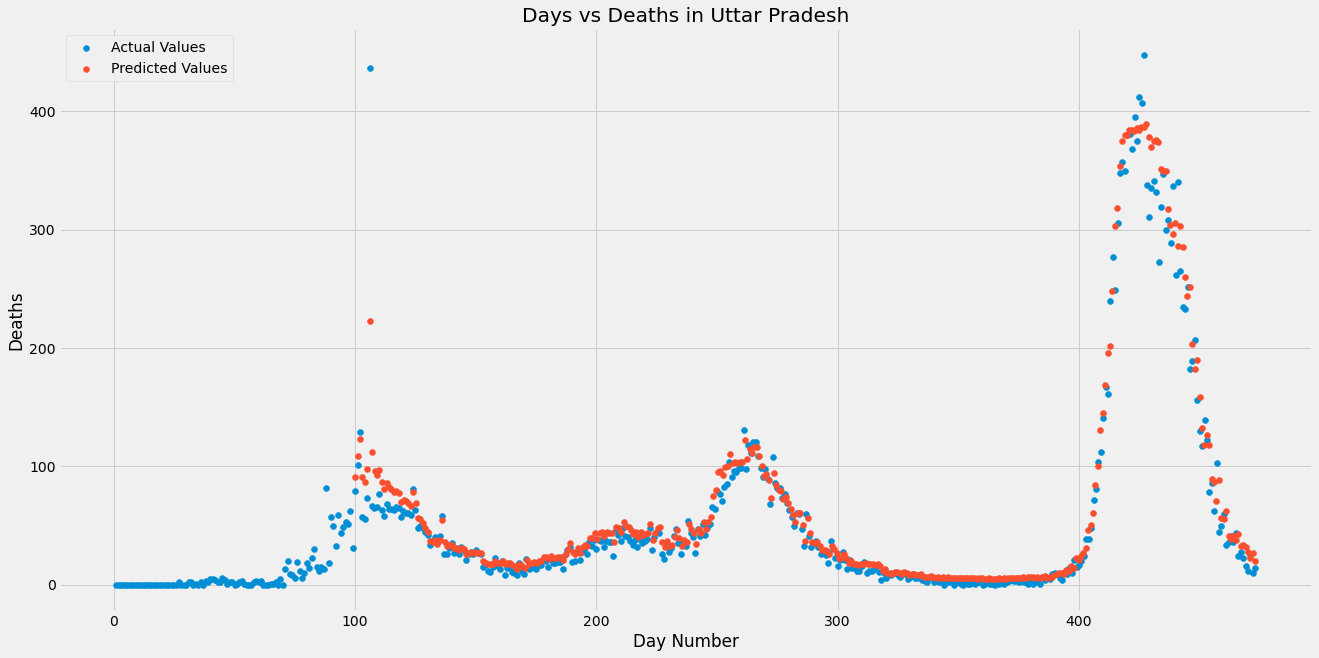

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
plt.ylabel('Deaths')
plt.xlabel('Day Number')
plt.title('Days vs Deaths in Uttar Pradesh')
plt.scatter(x3,b,label = 'Actual Values')
plt.scatter(x4,y_pred_1,label = 'Predicted Values')
plt.legend()

# Log of Deaths vs Number of Days

In [58]:
n_features = 1
X_train_ = X_train_.reshape((X_train_.shape[0], X_train_.shape[1], n_features))

In [59]:
model2 = Sequential()

model2.add(LSTM(50, input_shape=(n_steps, 1)))
model2.add(Dense((40)))
#model2.add(Dense((30)))
model2.add(Dense((20)))
model2.add(Dense(10))
model2.add(Dense(1))
model2.compile(optimizer='RMSprop', loss='mse')

# fit model
model2.fit(X_train_, y_train_, epochs=40, verbose=1)

Epoch 1/40
12/12 [==============================] - 0s 20ms/step - loss: 3.1696
Epoch 2/40
12/12 [==============================] - 0s 21ms/step - loss: 0.3401
Epoch 3/40
12/12 [==============================] - 0s 19ms/step - loss: 0.2084
Epoch 4/40
12/12 [==============================] - 0s 20ms/step - loss: 0.2868
Epoch 5/40
12/12 [==============================] - 0s 20ms/step - loss: 0.1871
Epoch 6/40
12/12 [==============================] - 0s 20ms/step - loss: 0.1582
Epoch 7/40
12/12 [==============================] - 0s 21ms/step - loss: 0.1868
Epoch 8/40
12/12 [==============================] - 0s 20ms/step - loss: 0.2117
Epoch 9/40
12/12 [==============================] - 0s 21ms/step - loss: 0.1725
Epoch 10/40
12/12 [==============================] - 0s 20ms/step - loss: 0.1408
Epoch 11/40
12/12 [==============================] - 0s 20ms/step - loss: 0.1579
Epoch 12/40
12/12 [==============================] - 0s 21ms/step - loss: 0.1741
Epoch 13/40
12/12 [==================

In [60]:
y_pred_2 = model2.predict(X_train_, verbose=0)

In [61]:
y_pred_2.shape

(373, 1)

In [62]:
x_,c_ = x[100:],c[100:]
c_.shape

(373,)

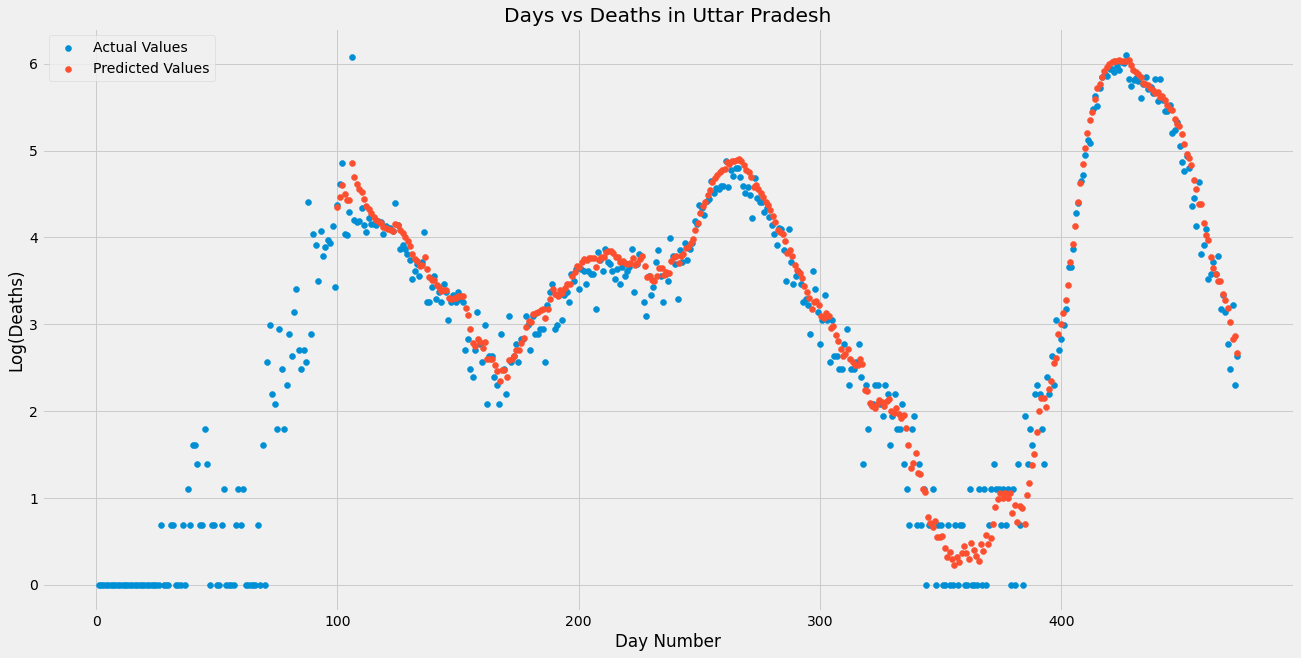

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
plt.ylabel('Log(Deaths)')
plt.xlabel('Day Number')
plt.title('Days vs Deaths in Uttar Pradesh')
plt.scatter(x3,c,label = 'Actual Values')
plt.scatter(x4,y_pred_2,label = 'Predicted Values')
plt.legend()

In [64]:
d = b
e = c

In [65]:
cnt = 373
for i in range(200):
    k1 = d[cnt:]
    k2 = e[cnt:]
    cnt +=1
    k1 = k1.reshape((1, 100, n_features))
    k2 = k2.reshape((1, 100, n_features))
    y1 = model1.predict(k1)
    #print(y)
    y2 = model2.predict(k2)
    y_pos = abs(y1)
    d = np.append(d,y_pos)
    e = np.append(e,y2)
    #print(c.shape)

In [66]:
d.shape

(673,)

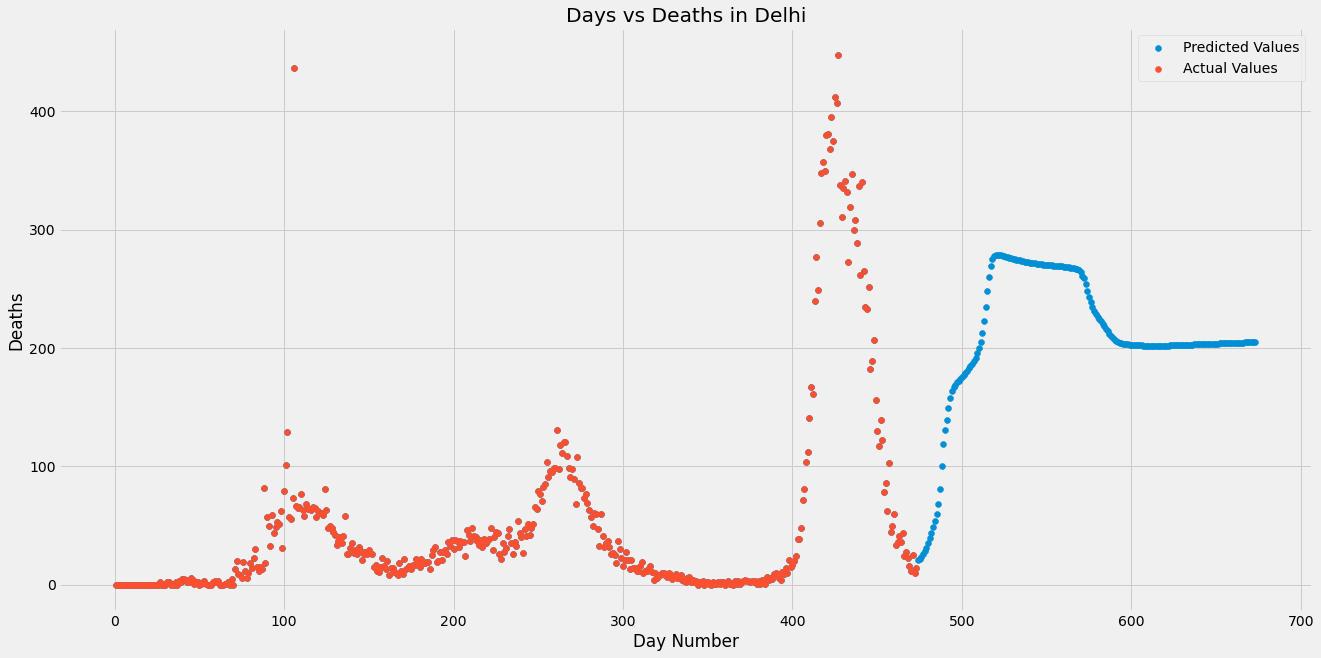

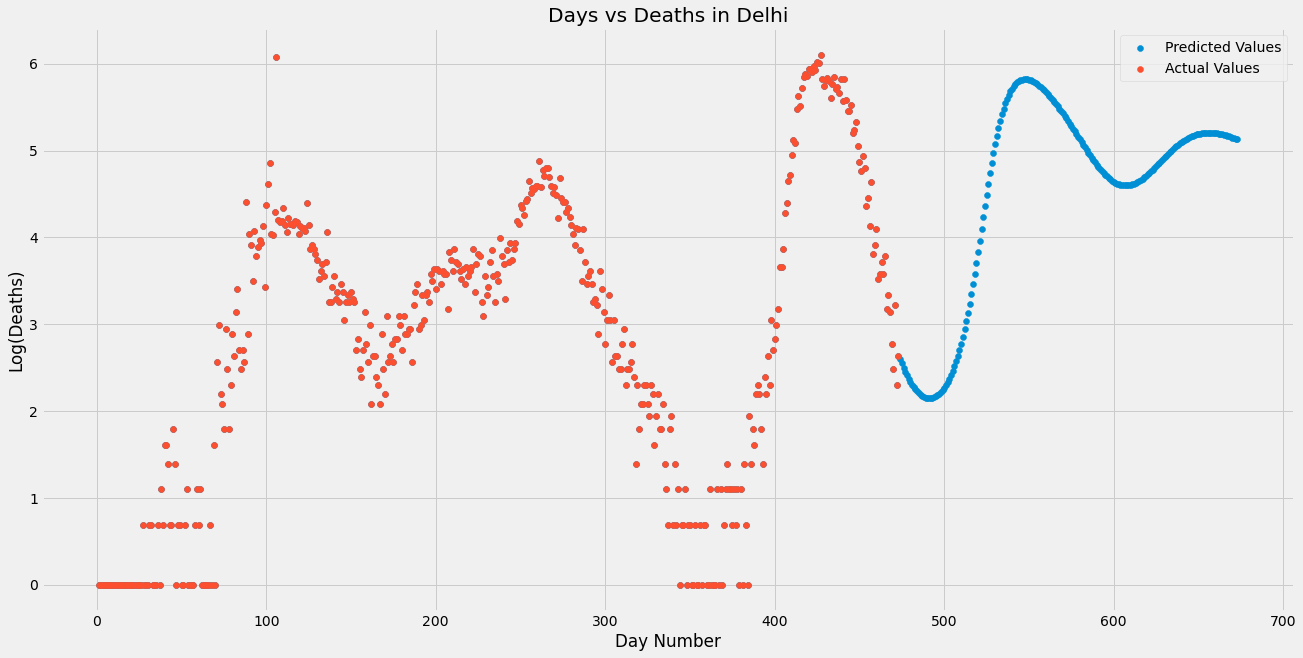

In [71]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))
plt.scatter(x2,d, label = 'Predicted Values')
plt.scatter(x3,b,label = 'Actual Values')
plt.ylabel('Deaths')
plt.xlabel('Day Number')
plt.title('Days vs Deaths in Delhi')
plt.legend()

plt.figure(figsize = (20,10))
plt.scatter(x2,e, label = 'Predicted Values')
plt.scatter(x3,c,label = 'Actual Values')
plt.ylabel('Log(Deaths)')
plt.xlabel('Day Number')
plt.title('Days vs Deaths in Delhi')
plt.legend()


In [68]:
np.max(d[473:])

279.0542907714844

In [69]:
np.max(e[473:])

5.820659637451172

In [70]:
2.71**6.126112461090088

449.1780941336019